In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
import seaborn as sns

In [28]:
# Load the data
data = pd.read_csv('demo.csv')
data.head()

,weight,height
0,45,145
1,85,190
2,50,150
3,90,195
4,55,155


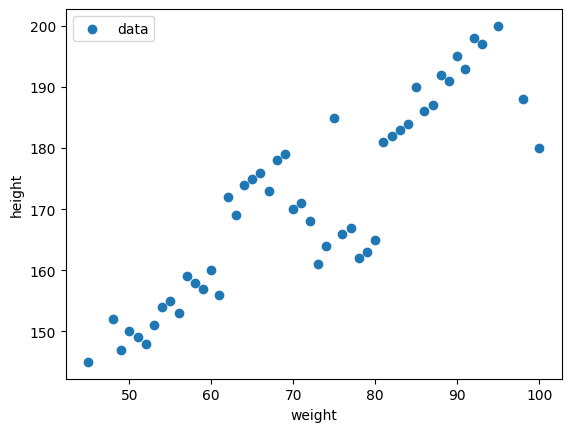

In [29]:
# scatter plot

plt.scatter(data['weight'],data['height'], label = "data")
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
 

In [30]:
# correlation
data.corr()

,weight,height
weight,1.000000,0.882202
height,0.882202,1.000000


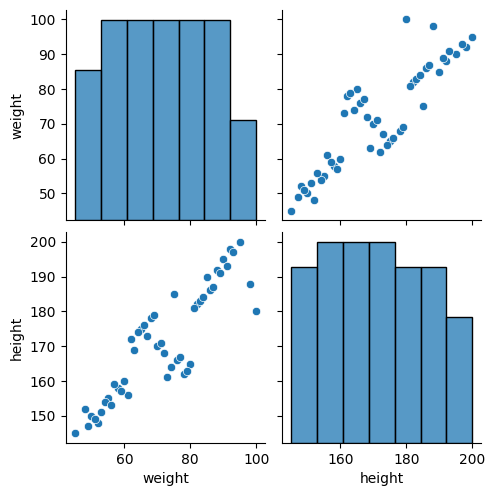

In [31]:
sns.pairplot(data)

In [32]:
# independent and dependent feature

X = data[['weight']]        # douple [[ ]] is used to convert to dataframe and it should be independent
xs = data['weight']

Y = data['height']          # this variable can be on series or 1D from
type(X)     # series
np.array(X).shape # dataframe

(50, 1)

In [33]:
xs.head()

0    45
1    85
2    50
3    90
4    55
Name: weight, dtype: int64

In [35]:
type(X)

pandas.DataFrame

In [36]:
type(xs)

pandas.Series

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 23)

In [41]:
X_train.shape

(37, 1)

In [42]:
#standarization

from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)     # fit_transform is for both fit and transform

In [46]:
X_test = scaler.transform(X_test)           # only apply to avoid data leckage to x_test

In [50]:
#apply linear regression

regression = LinearRegression(n_jobs=-1)

In [51]:
regression.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
print(f"cofffiecient is : {regression.coef_}")

cofffiecient is : [13.83623709]


In [56]:
print(f"intercept is : {regression.intercept_}")

intercept is : 170.24324324324326


<Axes: ylabel='height'>

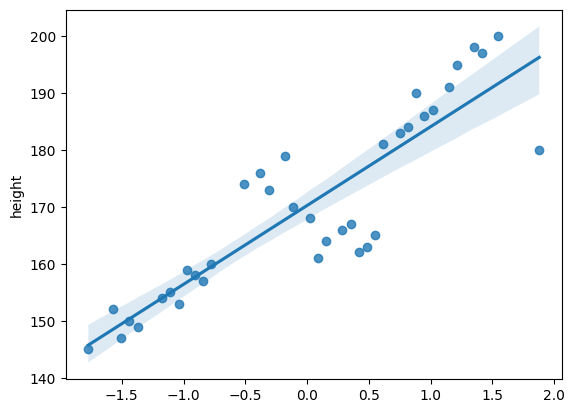

In [ ]:
sns.regplot(x = X_train[:,0], y = Y_train)

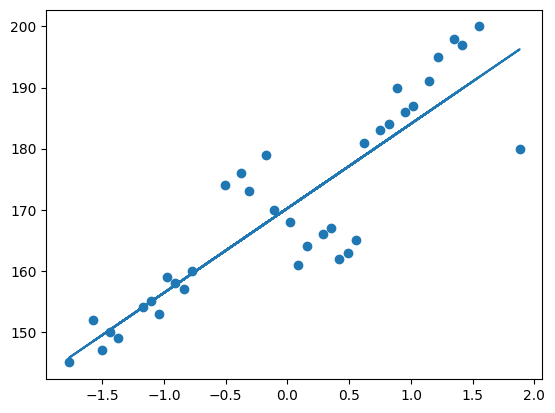

In [58]:
plt.scatter(X_train,Y_train)
plt.plot(X_train, regression.predict(X_train))

### prediction of the test data
1. predicted hight output = intercept + coef_(weights)
2. y_pred_test = 170.24 + 13.83(X_test)

In [59]:
y_pred = regression.predict(X_test) 

In [73]:
y_pred

array([152.16895377, 161.35506243, 194.42505361, 153.08756464,
       185.23894495, 187.99477755, 166.86672763, 164.11089503,
       162.2736733 , 160.43645157, 179.72727975, 173.29700369,
       169.62256023])

In [62]:
## performanse metrics
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(f"mse is : {mse}")
print(f"mae is : {mae}")
print(f"rmse is : {rmse}")

mse is : 53.73606792854096
mae is : 6.433161464109811
rmse is : 7.330488928341749


In [63]:
### r2 is a

r2 = r2_score(Y_test,y_pred)
print(f"r2 is : {r2}")

r2 is : 0.7363584892317419


In [64]:
# adjusted r2 is a

ar2  = (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print(f"adjusted r2 is : {ar2}")

adjusted r2 is : 0.2876089208380998


In [66]:
# OLS techniques

import statsmodels.api as sm


In [ ]:
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(f"your model predictions is : {prediction}") 

your model predictions is : [-18.07428947  -8.88818081  24.18181037 -17.15567861  14.99570171
  17.7515343   -3.37651562  -6.13234821  -7.96956995  -9.80679168
   9.48403651   3.05376045  -0.62068302]


In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 height   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.021
Method:                 Least Squares   F-statistic:                             0.2374
Date:                Fri, 30 Jan 2026   Prob (F-statistic):                       0.629
Time:                        15:54:49   Log-Likelihood:                         -242.61
No. Observations:                  37   AIC:                                      487.2
Df Residuals:                      36   BIC:                                      488.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.8362     28.400      0.487      0.629     -43.762      71.434
==============================================================================
Omnibus:                        2.188   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.028
Skew:                          -0.530   Prob(JB):                        0.363
Kurtosis:                       2.559   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# prediction of new weight

regression.predict(scaler.transform([[72]]))

c:\Users\PC\Desktop\Prime\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([170.54117109])